<h1><center>Laboratorio 4: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Estudiante:

- Mario González Otero

### **Link de repositorio de GitHub:** [ENLACE](https://www.github.com/mgzotero/MDS7202)

### Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **Ausentes tienen nota máxima 6.0**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
# !pip install --upgrade plotly
import plotly.express as px

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except: 
#     print('Ignorando conexión drive-colab')

## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [57]:
df_grades = pd.read_json("students_grades.json")
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   names                        1400 non-null   object
 1   gender                       1400 non-null   object
 2   race/ethnicity               1400 non-null   object
 3   parental level of education  1400 non-null   object
 4   lunch                        1400 non-null   object
 5   test preparation course      1400 non-null   object
 6   math score                   1400 non-null   object
 7   reading score                1400 non-null   object
 8   writing score                1400 non-null   object
dtypes: object(9)
memory usage: 98.6+ KB


Es posible observar que las columnas "math score", "reading score" y "writing score" se leen como objects (strings) y no como variables numéricas. A continuación se le aplicará un cast a estas columnas para que se lean como variables numéricas.

In [64]:
try:
    df_grades[["math score", "reading score", "writing score"]].astype(np.float64)
except:
    print("No es posible transformar los puntajes a variables numéricas.")

No es posible transformar los puntajes a variables numéricas.


No es posible aplicar la transformación deseada, esto se puede deber a que existen valores que no son numéricos en las columnas. A continuación se exploran estos fenómenos.

In [97]:
def not_numeric_object(row):
    try:
        np.float64(row)
        return False
    except:
        return True


# Guardamos una máscara para poder observar los elementos conflictivos
math_score_not_numeric = df_grades["math score"].apply(not_numeric_object)
reading_score_not_numeric = df_grades["reading score"].apply(not_numeric_object)
writing_score_not_numeric = df_grades["writing score"].apply(not_numeric_object)

In [107]:
np.unique(df_grades.loc[math_score_not_numeric, "math score"].values)

array([''], dtype=object)

In [108]:
np.unique(df_grades.loc[reading_score_not_numeric, "reading score"].values)

array([''], dtype=object)

In [109]:
np.unique(df_grades.loc[writing_score_not_numeric, "writing score"].values)

array([''], dtype=object)

Es posible observar que el elemento conflictivo (i.e. no casteable a numérico) es el string `''` (string vacío). Para poder seguir trabajando con los datos, se procederá a reemplazar estos valores por `np.nan`.

In [114]:
def cast_nan(row):
    try:
        return np.float64(row)
    except:
        return np.nan


cols = ["math score", "reading score", "writing score"]
df_grades[cols] = df_grades[cols].applymap(cast_nan)


<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [X] Imprimir un mensaje con las dimensiones del Dataframe.
2. [X] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [X] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [X] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [X] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [X] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [X] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [X] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [X] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [X] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot?, comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [159]:
def exploratory_data_analysis(df):
    """Función que realiza un análisis exploratorio de los datos.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame con los datos a analizar.

    Returns
    -------
    None
        La función no retorna nada, pero imprime en pantalla los resultados.
    """

    # Imprimir un mensaje con las dimensiones del Dataframe.
    print(f"1. El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas", end="\n\n")

    # Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
    print("2. Las columnas del DataFrame son:")
    print(*df.columns, sep="\n", end="\n\n")

    # Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
    print("3.a. Las primeras 5 filas del DataFrame son:")
    display(df.head())
    print()
    print("3.b. Las últimas 5 filas del DataFrame son:")
    display(df.tail())
    print()
    print("3.c. Muestra aleatoria de 5 filas del DataFrame:")
    display(df.sample(5, random_state=42))
    print()

    # Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
    print("4. Descripción de las variables numéricas del DataFrame:")
    display(df.describe().T)
    print()

    # Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
    print("5. El DataFrame tiene los siguientes valores nulos por columna:")
    display(pd.DataFrame(df.isna().sum(), columns=["nan count"]))
    print()

    # Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
    print("6. El DataFrame tiene los siguientes valores únicos por columna:")
    display(pd.DataFrame(df.nunique(), columns=["unique count"]))
    print()

    # Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
    print(f"7. El DataFrame tiene {df.duplicated(subset=['names']).sum()} filas duplicadas.", end="\n\n")

    # Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
    print("8. Las filas duplicadas son:")
    display(df[df.duplicated(subset=["names"])].sort_values(by=["names"]))
    print()

    # A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
    print("9. Boxplot de las notas:")
    df[["math score", "reading score", "writing score"]].plot.box()

**Respuesta Esperada:**

In [138]:
exploratory_data_analysis(df_grades)

1. El DataFrame tiene 1400 filas y 9 columnas

2. Las columnas del DataFrame son:
names
gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score

3.a. Las primeras 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0



3.b. Las últimas 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



3.c. Muestra aleatoria de 5 filas del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
873,Wanda Hardin,female,group E,some college,standard,none,87.0,85.0,93.0
1293,Terry Pulcher,male,group D,some college,free/reduced,completed,69.0,60.0,63.0
612,Robert Witmer,male,group A,bachelor's degree,standard,completed,193.0,142.0,142.0
1354,Stanley Chappell,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
1178,Christopher Emmons,male,group C,high school,free/reduced,completed,58.0,51.0,52.0



4. Descripción de las variables numéricas del DataFrame:


,count,mean,std,min,25%,50%,75%,max
math score,1360.0,89.538971,47.152422,0.0,59.0,72.0,97.25,196.0
reading score,1360.0,93.086029,46.385775,17.0,63.0,76.0,100.00,196.0
writing score,1353.0,91.852919,47.043570,10.0,62.0,75.0,100.00,196.0



5. El DataFrame tiene los siguientes valores nulos por columna:


,nan count
names,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,40
reading score,40
writing score,47


**Justificación:**

```
(a) Se puede observar que existen valores nulos en las columnas de "math score", "reading score" y "writing score" (los valores nulos de una columna no implica que hayan valores nulos en otra). Nótese que el hecho que existan valores nulos en estas columnas se debe a que se reemplazaron los strings vacíos por np.nan.
(b) Se puede observar que existen valores duplicados en la columna "names" (247).
(c) Se puede observar que las notas de los alumnos poseen valores anómalos (mayores a 100), por lo que es necesario realizar una limpieza de estos registros.
```

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [X] Crear función que permita limpiar el dataset.
- [X] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [176]:
def grades_below_100(row):
    """Genera una máscara que indica si el estudiante
    tiene sus notas menores o iguales a 100.

    Parameters
    ----------
    row : pd.Series
        Fila del DataFrame.

    Returns
    -------
    bool
        True si el estudiante tiene sus notas menores o iguales a 100.
        False en caso contrario.
    """

    # Si alguna de las notas es mayor a 100, retornamos False
    if (
        row["math score"] > 100
        or row["reading score"] > 100
        or row["writing score"] > 100
    ):
        return False
    
    # Si no, retornamos True
    return True


def clean_data(df):
    """Función que limpia los datos.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame con los datos a limpiar.

    Returns
    -------
    pd.DataFrame
        DataFrame con los datos limpios.
    """

    # Copiamos el DataFrame para no modificar el original
    clean_df = df.copy(deep=True)

    # Eliminamos las filas con notas mayores a 100
    clean_df = clean_df[clean_df.apply(grades_below_100, axis=1)]

    # Eliminamos las filas con valores nulos
    clean_df = clean_df.dropna().drop_duplicates(subset=["names"])

    return clean_df

In [179]:
df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1. El DataFrame tiene 1000 filas y 9 columnas

2. Las columnas del DataFrame son:
names
gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score

3.a. Las primeras 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0



3.b. Las últimas 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



3.c. Muestra aleatoria de 5 filas del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
750,Stephen Broenneke,male,group B,some college,standard,none,54.0,52.0,51.0
1039,Donald Greenberg,male,group C,associate's degree,standard,none,46.0,43.0,42.0
1044,Karen Wagaman,female,group B,associate's degree,standard,none,80.0,86.0,83.0
938,Brenna Pate,female,group A,bachelor's degree,standard,none,51.0,49.0,51.0
586,Larry Torres,male,group D,associate's degree,free/reduced,none,53.0,54.0,48.0



4. Descripción de las variables numéricas del DataFrame:


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0



5. El DataFrame tiene los siguientes valores nulos por columna:


,nan count
names,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



6. El DataFrame tiene los siguientes valores únicos por columna:


,unique count
names,1000
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77



7. El DataFrame tiene 0 filas duplicadas.

8. Las filas duplicadas son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score



9. Boxplot de las notas:


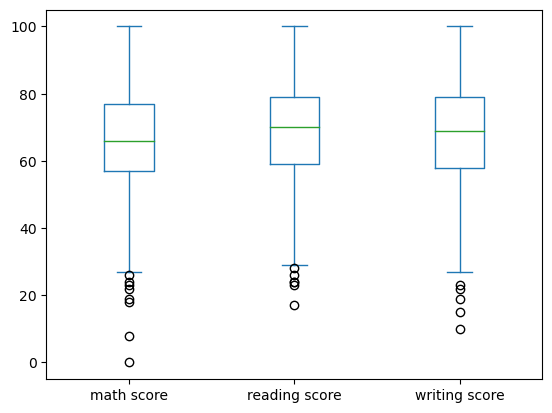

In [180]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
(a) Se puede observar que no existen valores nulos en las columnas de "math score", "reading score" y "writing score".
(b) Se puede observar que no existen valores duplicados en la columna "names".
(c) Se puede observar que las notas de los alumnos no poseen valores anómalos (mayores a 100).
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [X] Tranforme los valores a la escala chilena.

**Respuesta:**

In [187]:
def nota_chilena(df_in, cols=None):
    """Función que transforma una columna de notas en la escala chilena.

    Parameters
    ----------
    df_in : pd.DataFrame
        DataFrame con los datos a transformar.
    cols : list, optional
        Columnas a transformar. Por defecto, None.

    Returns
    -------
    pd.DataFrame
        DataFrame con las columnas transformada.
    """

    # Si no se especifica la columna, se imponen
    if not cols:
        cols = ["math score", "reading score", "writing score"]

    # Copiamos el DataFrame para no modificar el original
    df_out = df_in.copy(deep=True)

    # Transformamos las notas
    df_out[cols] = df_out[cols].applymap(
        lambda porc: np.round(porc * 0.06 + 1, 2)
    )

    return df_out

1. El DataFrame tiene 1000 filas y 9 columnas

2. Las columnas del DataFrame son:
names
gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score

3.a. Las primeras 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22



3.b. Las últimas 5 filas del DataFrame son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72
1399,Amanda Perez,female,group A,high school,standard,completed,5.08,5.80,5.56



3.c. Muestra aleatoria de 5 filas del DataFrame:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
750,Stephen Broenneke,male,group B,some college,standard,none,4.24,4.12,4.06
1039,Donald Greenberg,male,group C,associate's degree,standard,none,3.76,3.58,3.52
1044,Karen Wagaman,female,group B,associate's degree,standard,none,5.80,6.16,5.98
938,Brenna Pate,female,group A,bachelor's degree,standard,none,4.06,3.94,4.06
586,Larry Torres,male,group D,associate's degree,free/reduced,none,4.18,4.24,3.88



4. Descripción de las variables numéricas del DataFrame:


,count,mean,std,min,25%,50%,75%,max
math score,1000.0,4.96534,0.909785,1.00,4.420,4.96,5.62,7.0
reading score,1000.0,5.15014,0.876012,2.02,4.540,5.20,5.74,7.0
writing score,1000.0,5.08324,0.911739,1.60,4.465,5.14,5.74,7.0



5. El DataFrame tiene los siguientes valores nulos por columna:


,nan count
names,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0



6. El DataFrame tiene los siguientes valores únicos por columna:


,unique count
names,1000
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77



7. El DataFrame tiene 0 filas duplicadas.

8. Las filas duplicadas son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score



9. Boxplot de las notas:


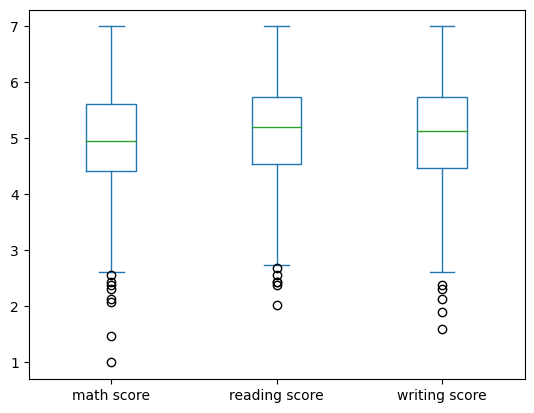

In [189]:
df_grades1 = nota_chilena(df_grades)
exploratory_data_analysis(df_grades1)

### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [X] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [192]:
def alumnos_promedio(df_in):
    """Función que calcula el promedio de las notas de los alumnos.

    Parameters
    ----------
    df_in : pd.DataFrame
        DataFrame con los datos a transformar.

    Returns
    -------
    pd.DataFrame
        DataFrame con las columnas transformada.
    """

    # Copiamos el DataFrame para no modificar el original
    df_out = df_in.copy(deep=True)

    # Calculamos el promedio
    df_out["GPA"] = df_out[["math score", "reading score", "writing score"]].mean(axis=1)

    return df_out

In [194]:
df_grades2 = alumnos_promedio(df_grades1)
df_grades2.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


**Respuesta Esperada:**

In [ ]:
# df_grades = alumnos_promedio(df_grades)
# df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [X] Obtener DataFrame con los alumnos que reprobaron el año.
- [X] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [X] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [229]:
def reprobados_destacados(df_in):
    """Función que calcula los alumnos destacados y reprobados.

    Parameters
    ----------
    df_in : pd.DataFrame
        DataFrame con los datos a transformar.

    Returns
    -------
    tuple[pd.DataFrame]
        Tupla de DataFrames con las columnas transformadas.
    """
    df_out1 = df_in.copy(deep=True)  # Reprobados
    df_out2 = df_in.copy(deep=True)  # Reprobados (R)
    df_out3 = df_in.copy(deep=True)  # Destacados

    df_out1 = df_out1[df_out1["GPA"] < 4].reset_index(drop=True)

    df_out2["GPA"] = df_out2["GPA"].apply(lambda gpa: "R" if gpa < 4 else gpa)
    df_out2.reset_index(drop=True, inplace=True)

    df_out3 = df_out3[
        (df_out3["math score"] > 5.8)
        & (df_out3["reading score"] > 5.8)
        & (df_out3["writing score"] > 5.8)
    ].sort_values(by=["GPA"], ascending=False).reset_index(drop=True)

    return df_out1, df_out2, df_out3

In [234]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades2)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
98,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
99,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
100,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
101,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [237]:
dataframe1

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
2,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
3,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
4,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
98,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
99,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
100,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
101,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [235]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [236]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
1,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
2,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
3,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
4,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
105,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
106,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
107,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
108,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


**Respuesta:**

```
Es posible observar que 103 alumnos han reprobado según su GPA (dataframe1) y que 110 alumnos se consideran destacados según el criterio expuesto anteriormente (que las tres notas sean simultáneamente superiores a 5.8) (véase dataframe2).
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [241]:
def consulta_gpa(df_in, lista_alumnos):
    """Función que consulta el GPA de una lista de alumnos.

    Parameters
    ----------
    df_in : pd.DataFrame
        DataFrame con los datos a transformar.
    lista_alumnos : list
        Lista de nombres de alumnos.

    Returns
    -------
    pd.DataFrame
        DataFrame con las columnas transformada.
    """

    # Copiamos el DataFrame para no modificar el original
    df_out = df_in.copy(deep=True)

    # Filtramos los alumnos
    df_out = df_out[df_out["names"].isin(lista_alumnos)]

    return df_out[["names", "GPA"]]


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,GPA
203,Lucille Stanphill,5.94
396,Marcus Mcfarland,4.86
446,Matthew Freeman,R
449,Dana Mojica,R
604,Paul Hyder,6.2
647,Jeffrey Korn,4.54
748,Robert Strain,4.4
752,Ronald Jett,R
754,Hazel Posey,R
849,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [244]:
df_grades2["GPA cuantiles"] = pd.qcut(
    df_grades2["GPA"], q=5, labels=["Bajísimo", "Bajo", "Medio", "Alto", "Muy alto"]
)

In [245]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.



# Código de gráfico 
fig = px.scatter(
    df_grades2.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


```
Es posible esbozar una leve relación entre el nivel educacional de los padres y el promedio de los alumnos. En particular, se puede observar que a medida que el nivel educacional de los padres aumenta, el mínimo GPA de los respectivos alumnos va aumentando (véase el GPA más bajo de cada nivel educacional en el gráfico). Sin embargo, esta relación no es tan clara, ya que se va perdiendo a medida que inspeccionamos los cuantiles superiores (véanse los GPAs más altos de cada nivel educacional en el gráfico) por lo que, si bien es posible observar una tendencia en los cuantiles inferiores, es posible que el nivel educacional no sea muy buen predictor del GPA a niveles superiores debido a la injerencia de otros factores no observados.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://gifdb.com/images/high/orange-cat-cat-walking-with-two-legs-xlgf7qx4i24da74f.gif" width="400">
</p>


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>